# Anomaly detection: Detección de Anomalías.
## Aplicaciones
* Deteccion de fraude.
* En la salud. Deteccion de cancer.
* Prevencion de crimen.
* Etc.
Este este metodo es puramente estadistico.

Asumamos que los datos y el modelo son reales $\mathbb{R}$.
## Distribucion normal.
$$p(x ; \mu, \sigma^2) = \mathcal{N}(\mu, \sigma^2)
= \frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e}^{-\frac{(x-\mu)^2}{\sigma^2}}$$

* Donde $x$ es un dato
* Donde $\mu$ es la media
$$\mu= \frac1m \sum_{i=1}^m x^{(i)} $$
* Donde $\sigma^2$ es la varianza
$$\sigma^2 = \frac{1}{m} \sum_{i=1}^m ( x^{(i)} - \mu)^2  $$
La funcion $p(x; \mu, \sigma^2)$ es una funcion de densidad continua.

La probabilidad  se da en un intervalo
$$P(a \le x \le b ) = \int_a^b p(x; \mu, \sigma^2) dx $$
Esto no lo usamos en este cursa.





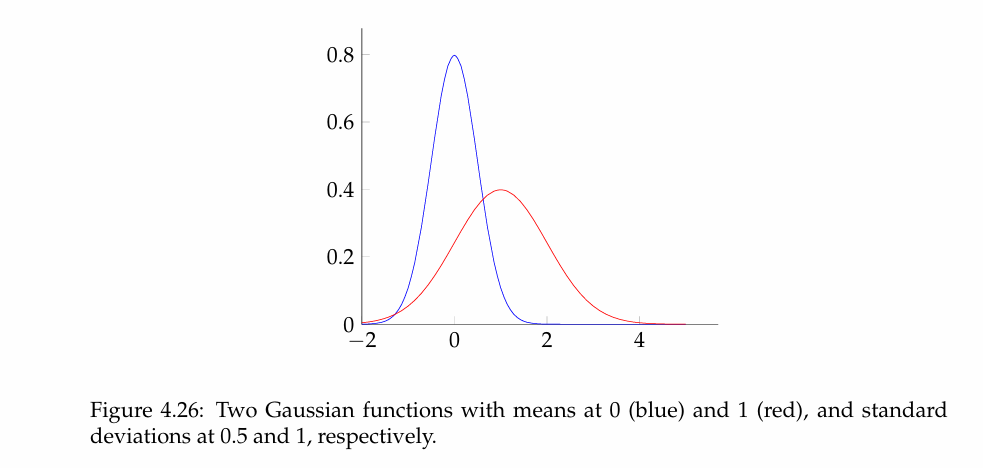

Que pasa si estamos en $n$ dimensions. En $\mathbb{R}^n$
## Distribucion normal multivariada

$$p(x, \mu, \Sigma) =\mathcal{N}(\mu, \Sigma) = \frac{1}{\sqrt{(2 \pi)^n | \det \Sigma } | } \mathrm{e}^{-\frac12 (x - \mu)^T \Sigma^{-1} (x - \mu)}  $$
donde
* $\mu$ es la media (vectorial)
$$\mu_i = \frac1m \sum_{j=1}^m x_i^{(j)} $$
y
* $\Sigma$ se llama la matriz de **covarianza**.
$$\Sigma = \frac1m (X - \mu)^T (X -\mu) $$
donde $X$ es la matriz de datos. Se construye con las filas $x^{(i)}$.
La matriz $\Sigma^{-1}$ se llama **concentration matrix**.
Veamos graficas que expliquen esta distribuci'on vectorial de probabildad (densidad).


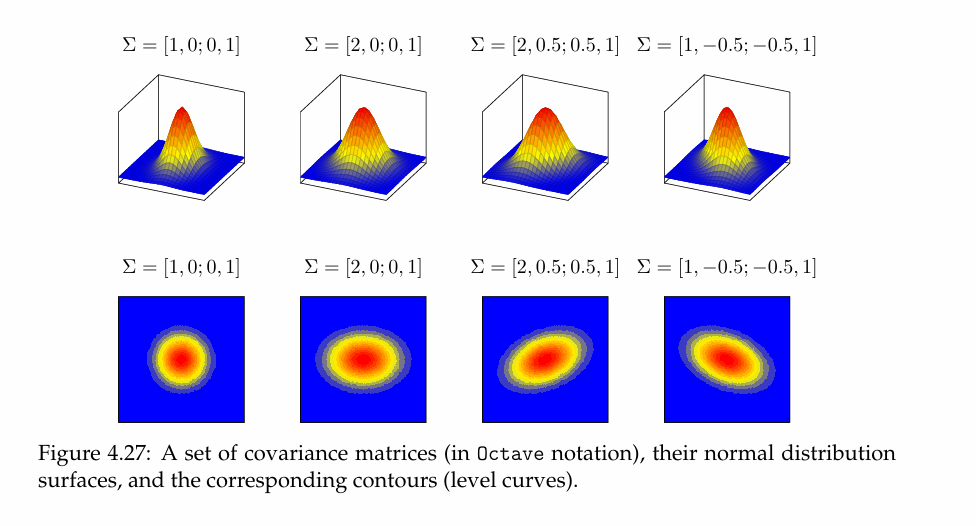

La notacion de estas graficas es la de matlab

$$[a,b,c,d] = \begin{pmatrix}a & b \\ c & d \end{pmatrix} $$

Que pasa si la matriz de covarianza diagonal?

$$
\Sigma =
\begin{pmatrix}
\sigma_1^2 & 0 & \cdots & \cdots & \cdots & 0 \\
0 & \sigma_2^2 & 0 & \cdots & \cdots & \vdots  \\
\vdots  & \ddots & \sigma_3^2  & \ddots & & \vdots  \\
\vdots & & \ddots & \ddots & \ddots & \vdots \\
\vdots & & & \ddots & \ddots & 0  \\
0 & \cdots & \cdots & \cdots & 0 & \sigma_n^2
\end{pmatrix}
$$

En este caso
$$
\Sigma^{-1} =
\begin{pmatrix}
\sigma_1^{-2} & 0 & \cdots & \cdots & \cdots & 0 \\
0 & \sigma_2^{-2} & 0 & \cdots & \cdots & \vdots  \\
\vdots  & \ddots & \sigma_3^{-2}  & \ddots & & \vdots  \\
\vdots & & \ddots & \ddots & \ddots & \vdots \\
\vdots & & & \ddots & \ddots & 0  \\
0 & \cdots & \cdots & \cdots & 0 & \sigma_n^{-2}
\end{pmatrix}
$$
Entonces tenemos que

* El determinante
$$\det \Sigma = \prod_{j=1}^n \sigma_j^2 $$
* El coeficiente
$$\frac{1}{\sqrt{(2 \pi)^n | \det \Sigma |}} = \frac{1}{(2 \pi)^n \prod_{j=1}^n
\sigma_j^2} $$

* El exponente
$$-\frac12 ( x^{(i)} - \mu)^T \Sigma^{-1} (x^{(i)} - \mu) = -\frac12 \sum_{j=1}^n \frac{(x_j^{(i)} - \mu_j)^2}{\sigma_j^2} $$

El algoritmo de deteccion de anomalias exige un umbral a partir el cual los eventos son anomalos. Se definen como anomalias las que queden por debajo de este umbral $\epsilon$.

Algoritmo:
* Elija el umbral (threshold) $\epsilon$.
* Seleccione las muestras $x^{(i)}$.
* Encontrar la media y la varianza (vectoriales)
$$\mu_i = \frac1m \sum_{j=1}^m x_i^{(j)} $$
$$\sigma_i^2 = \frac1m \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2 $$
* Genere la funcion de densidad. (asumimos independencia estadistica. Matriz de covarianza diagonal)
$$p(x) = \prod_{i=1}^n p(x_i; \mu_i, \sigma_i^2) = \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma_j^2}} \mathrm{e}^{-\sum_{i=1}^n \frac{x_i - \mu_i}{2 \sigma_i^2}}$$

* Comparar el valor de la densidad
Es $$p(x) \le \epsilon $$?
    * Si: Es anomalia
    * No : No es anomalia.

Como se calcula $\epsilon$.
Se puede usar metodos supervisados donde conocemos las muestra buenas $y=0$ y las malas $y=1$. Con esto podemos referirnos a los metodos de matriz de confusion para determinar por ejemplo Score F1 y demas para determinar $\epsilon$.

Otra forma es decir que de 3 desviaciones estandard $\sigma$ en adelante son muestras.

Que pasa si la distribucion no es normal?
Por que la distribucion normal es conveniente?
    * Es comun en la naturaleza
    * Los parametros $\mu, \sigma$ son faciles de determinar a partir de los datos.

Si la distribucion no es normal tenemos dos alternativas
* Volverla normal. Mediante una transformaci'on. Por ejemplo
$$x \mapsto \sqrt{x} $$
$$x \mapsto \log(x + c)$$ donde $c$ es una constante.
* Asumir la distribucion como tal. Por ejemplo si
[La distribuci'on es Poisson](https://en.wikipedia.org/wiki/Poisson_distribution) debemos calcluar el parametro $\lambda$.
Hay muchas otras distribciones. Por ejemplo,exponencial, log normal distribution, etc.




# Sistemas de recomendacion (recomendation systems)
Aporta mucho dinero al e-comerce.

Con ejemplos vemos en que consisten
* Seleccionar una cancion en **spotify**
* Seleccionar un video en **YouTube**
* Un libro en **Amazon**.
* Peliculas en NetFlix.

Estos metodos son **semisupervisados**.

Existen dos tipos de sistemas de recomendacion
* Basado en contenido.
* Filtros colaborativos.

## Basados en contenido.
La Figura 5.1 explica este metodo. Yo me extiendo en la explicacion.

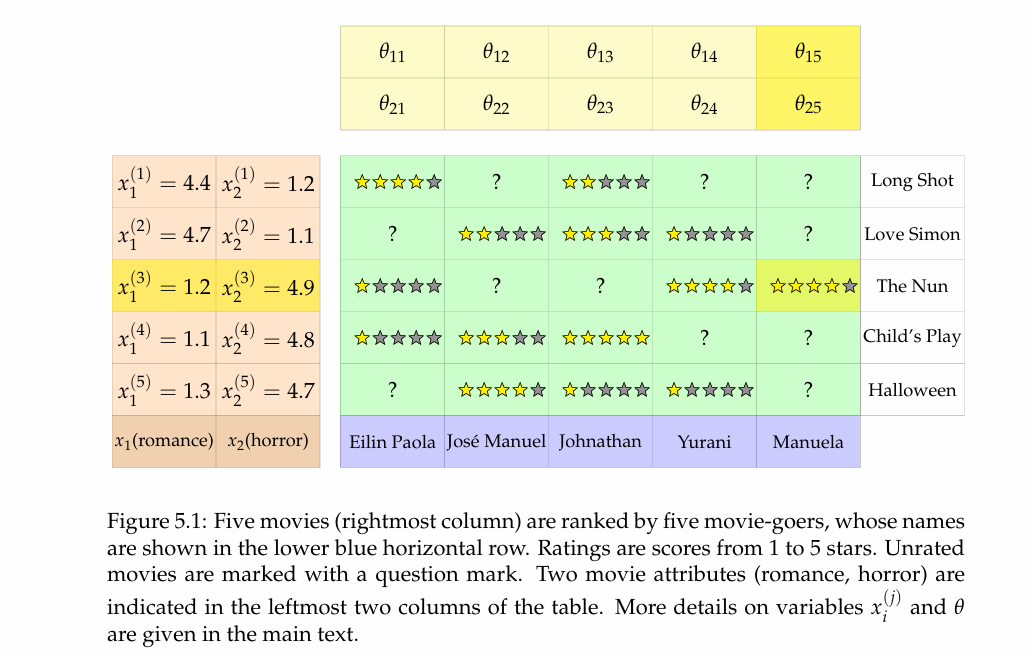


El problema se mira como una regresion lineal.

 Las estrellas son los $y$s, los $\theta$ son los parametros (ML parameters) los $x$ son los features. Lo que tenemos en la Figura 5.1 es una multiplicacion de dos matrices ($X, \Theta$) que produce una tercera matriz  $Y$.

 *  Por ejemplo la matriz $Y$ es $n_m \times n_u$ donde
    * $n_m$ es el numero de peliculas
    * $n_u$ es el numero de usuarios
* La matrix $\Theta$ es $n_f \times n_u$ donde $n_f$ es el numero de features (caracteristicas) y $n_u$ el numero de usuarios.
* La matriz $X$ es $n_m \times n_f$.

En componentes

$$y_{ij} = ( x^{(i)})^T \Theta_j $$
Mas concretamente. Pensemos en el usuario "Manuela" y la pelicula "The Nun".

$$y_{35} = x_1^{(3)} \theta_{15} + x_2^{(3)} \theta_{25} = (1.2, 4.9) \cdot (\theta_{15}, \theta_{25}) = 4. $$

Se ve entonces esto como un problema de regresion lineal donde la funcion de costo es

$$J_\Theta = \frac12 \| Y - X \Theta \|_F^2 + \frac{\lambda}{2} \| \Theta \|_F^2 \tag{1} $$

Que pasa son las interrogaciones $?$
Definimos una matriz (masking) que es 0 para las interrogaciones y 1 para los calificados.

$$
r_{ij} =
\begin{cases}
1 & \text{si la pelicula $i$ fue calificada por el usuario $j$} \\
0 & \text{si la pelicula $i$ no fue calificada por el usuario $j$}
\end{cases}
$$

Redefinimos la funcion de costo (1) como

$$J_\Theta = \frac12 \| R \circ (Y - X \Theta) \|_F^2 + \frac{\lambda}{2} \| \Theta \|_F^2 \tag{2} $$

Se resuelve esta ecuacion. Se encuentra $\Theta$ y con este $\Theta$ llenamos la matriz $Y$ de nuevo. Se completan las $?$.

## Filtros colaborativos.
A las 10:40 pm.

Que pasa si no tenemos los "features"?

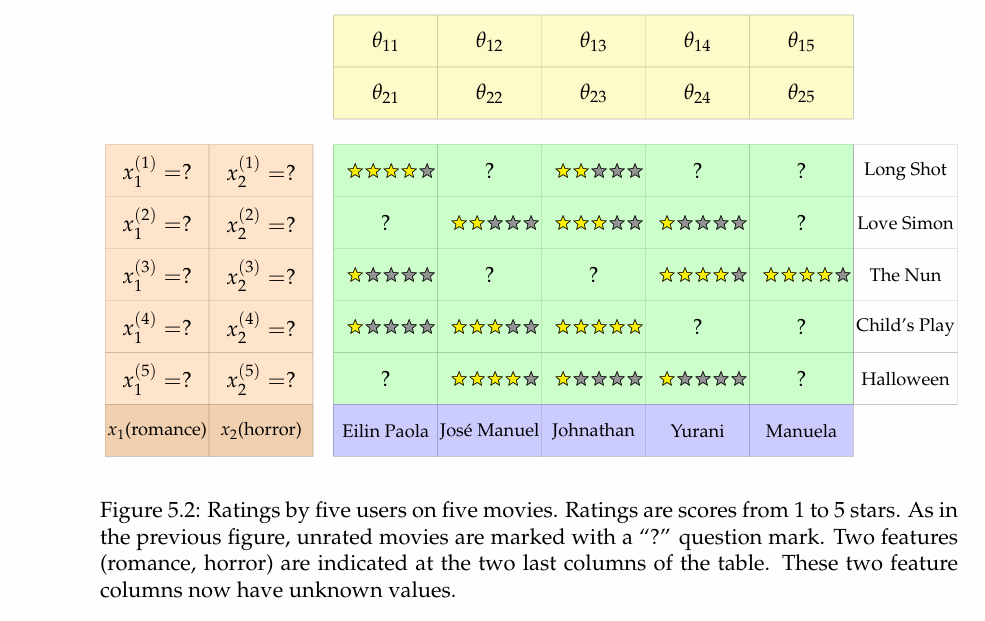

Redefinamos la funcion de costo, ya teniendo en cuenta $X$

$$J_\Theta = \frac12 \| R \circ (Y - X \Theta) \|_F^2 + \frac{\lambda}{2} \| X \|_F^2 \tag{3} $$

Hay dos alternativas para resolver este problema.

1. Adivinar un $\Theta_1$, con este $\Theta_1$ halla $X$ que lo llammos $X_1$.
Pero con este $X_1$ calculamos $\Theta_2$ y con este $\Theta_2$ calculamos $X_2$ y asi hasta obtener alguna "convergencia" .

En simbolos
$$X_1 \to \Theta_1 \to X_2 \to \Theta_2 \to \cdots \to X_n \to \Theta_n. $$

La otra forma
2. Inversion conjunta. Se resulven $X, \Theta$ simultanemente.
Para esto formamos la siguiente funcion de costo

$$J = \frac12 \| R \circ (Y - X \Theta) \|_F^2 + \frac{\lambda}{2} \| \Theta \|_F^2 +  \frac{\lambda}{2} \| X \|_F^2 \tag{4} $$

Este problema se resuelve con el gradiente que calculamos a continuacion.

En componentes

$$J = \frac12 \sum_{i=1}^{n_m} \sum_{j=1}^{n_u}
r_{ij} \left ( y_{ij} - \sum_{k=1}^{n_f} x_{ik} \theta_{kj} \right )^2
+ \frac{\lambda}{2}
\left ( \sum_{i=1}^{n_f} \theta_{ij}^2  + \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} x_{ij}^2   \right ) . $$
Tomamos las derivadas parciales con respecto a $x_{st}$

$$\frac{\partial J}{\partial x_{st}} = \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \left ( \sum_{k=1}^{n_f}  x_{ik} \Theta_{kj} - y_{ij} \right )
\sum_{k=1}^{n_f} \theta_{kj} \frac{\partial x_{ik}}{\partial x_{st}}
+ \lambda \sum_{i=1}^{n_f} \sum_{j=1}^{n_f} x_{ij} \frac{\partial x_{ij}}{\partial x_{st}}  $$

Aca hay un problema de indices.  Las dos sumas sobre $k$ me dan problemas entonces cambia la segunda con indice $p$ en vez de $k$


\begin{eqnarray}
\frac{\partial J}{\partial x_{st}} &=& \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \left ( \sum_{k=1}^{n_f}  x_{ik} \Theta_{kj} - y_{ij} \right )
\sum_{p=1}^{n_f} \theta_{pj} \frac{\partial x_{ip}}{\partial x_{st}}
+ \lambda \sum_{i=1}^{n_f} \sum_{j=1}^{n_f} x_{ij} \frac{\partial x_{ij}}{\partial x_{st}}   \\
 &=& \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \left ( \sum_{k=1}^{n_f}  x_{ik} \Theta_{kj} - y_{ij} \right )
\sum_{p=1}^{n_f} \theta_{pj}  \delta_{is} \delta_{pt}
+ \lambda \sum_{i=1}^{n_f} \sum_{j=1}^{n_f} x_{ij}
\delta_{is} \delta_{jt}  \\
&=& \sum_{j=1}^{n_u} r_{st} \left (
    \sum_{k=1}^{n_f}  x_{sk} \theta_{kj} - y_{sj}
    \right ) \theta_{tj} + \lambda x_{st}
\end{eqnarray}

Esta ecuacion la podemos escribir de forma matricial

$$\nabla_X J = [ R \circ (X \Theta - Y)] \Theta^T + \lambda X $$

De la misma forma (tarea)
$$\nabla_\Theta J = X^T [ R \circ (X \Theta - Y)] + \lambda \Theta $$

Con estos gradientes se propaga el metodo hasta hallar la solucion optima
$(X, \Theta)$.

Por que se llama colaborativo. Se se encuentra $X$, y tenemos que dos caracteristicas
$ \| X^{(i)} - X^{(j)} \| $
es pequeno, entonces si a alguien se identifica con $X^{(i)}$ tambien se podria identificar con $X^{(j)}$. Mas que esto si alguien tiene gustos parecidos a otra persona y le da 5 estrellas a una pelicula, el sistema (Netflix) le manda un mensaje a esta otra persona suegiriendole esta pelicula.

## Normalizacion por la media.
La Figura 5.3 ilustra el problema.


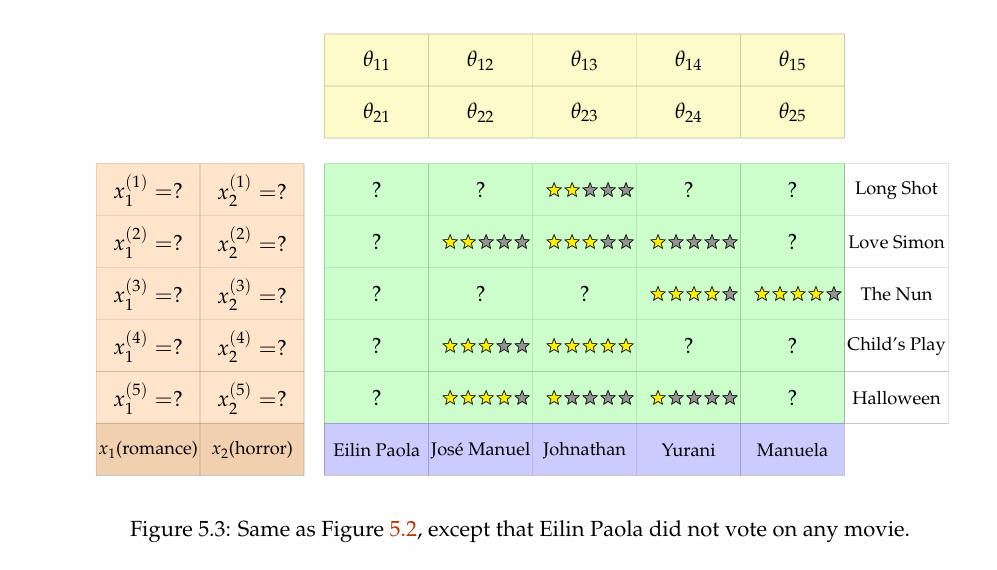

Si observamos el caso de Eilin Paola,

$$J^{(j_0)} =\frac{\lambda}{2} (  \| \Theta_{(j_0)} \|_F^2 + \| X \|_F^2 ) $$
La minimizacion de esto es $\Theta=0$, $X=0$ y
$$Y^{(ij)} = {X^{(i)}}^T \Theta_{(j)} = 0$$

Lo que se hace es restar la media por pelicula a todo el sistema

$$y_{i1} \leftarrow  (X^{(i)})^T \Theta_1 + \mu_i $$
Graficamente veamos la Figura 5.4

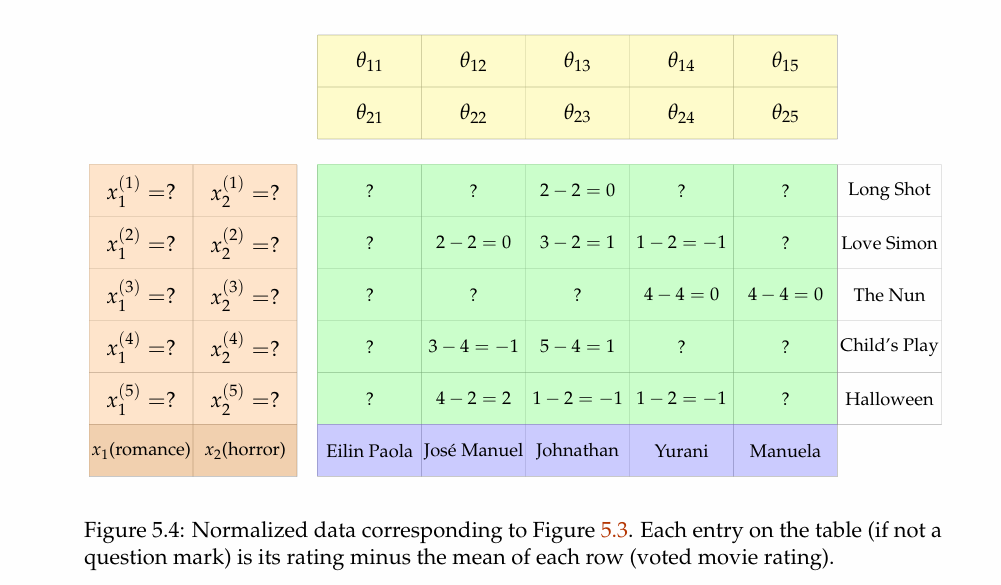

# Photo OCR: Optical Character Recognition:  reconocimento de caracteres opticos.

Hay un paquete
[Tesseract](https://github.com/tesseract-ocr/tesseract) el cual converite documentos escaneados o fotografiados a texto. Utilidades
* Convertir documentos a texto que se puede buscar con `Ctrl-f`.
* Identificar placas de vehiculos.
* Vehiculos autonomos.


El metodo para esto es un metodo de "pipeline"  (flujo de proceso)

* Detectar donde hay texto.
* Segmentarlo (partir texto en letras o simbolos)
* Identificar simbolos (recuerden el MNIST)
* Usar procesador de palabras para verificar ortografia, sintaxis, etc.

## Deteccion de texto.



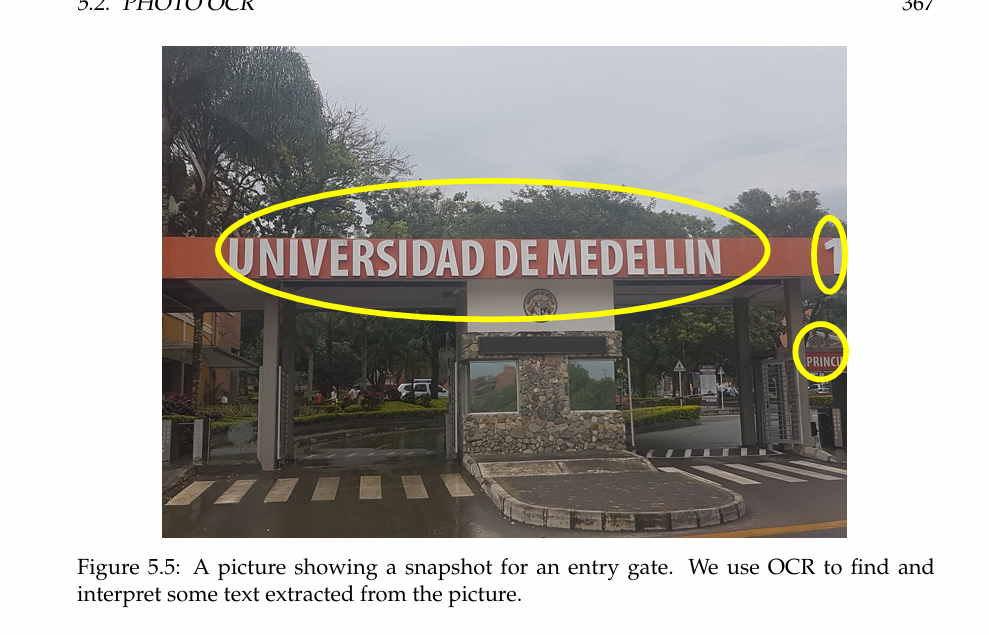


Esto se hace con una caja deslizante y entrenamiento con muchas fotos con texto.

La Figura 5.6 muestra los tres procesos juntos.

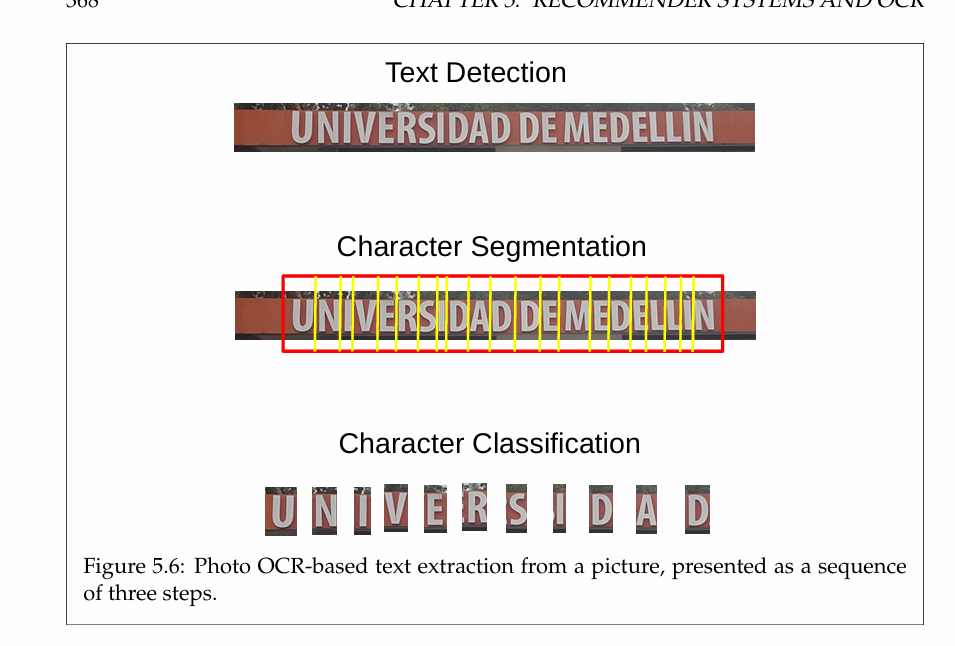

La Fogura de 5.7 " pipeline"  muestra el proceso

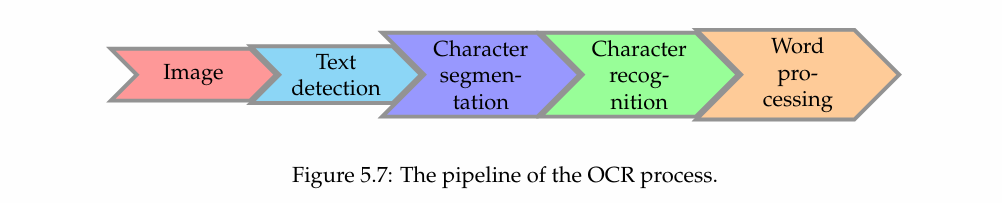

La Figura 5.8 muestra como se entrena el reconocimiento de texto.

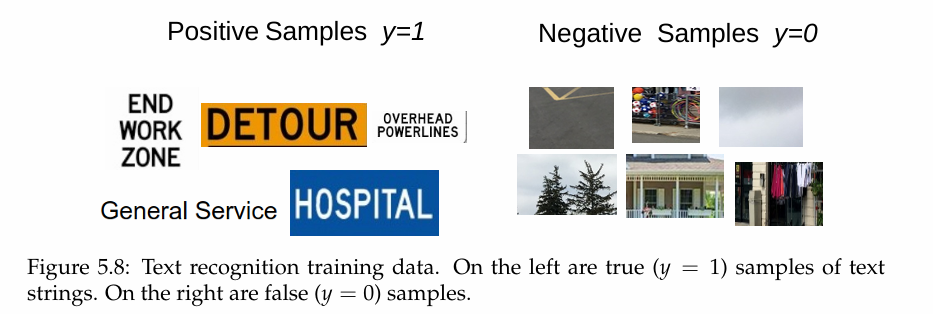

## Segmentqacion de texto.
La Figura 5.9 ilustra como hace la segmentacion con cajas moviendose.

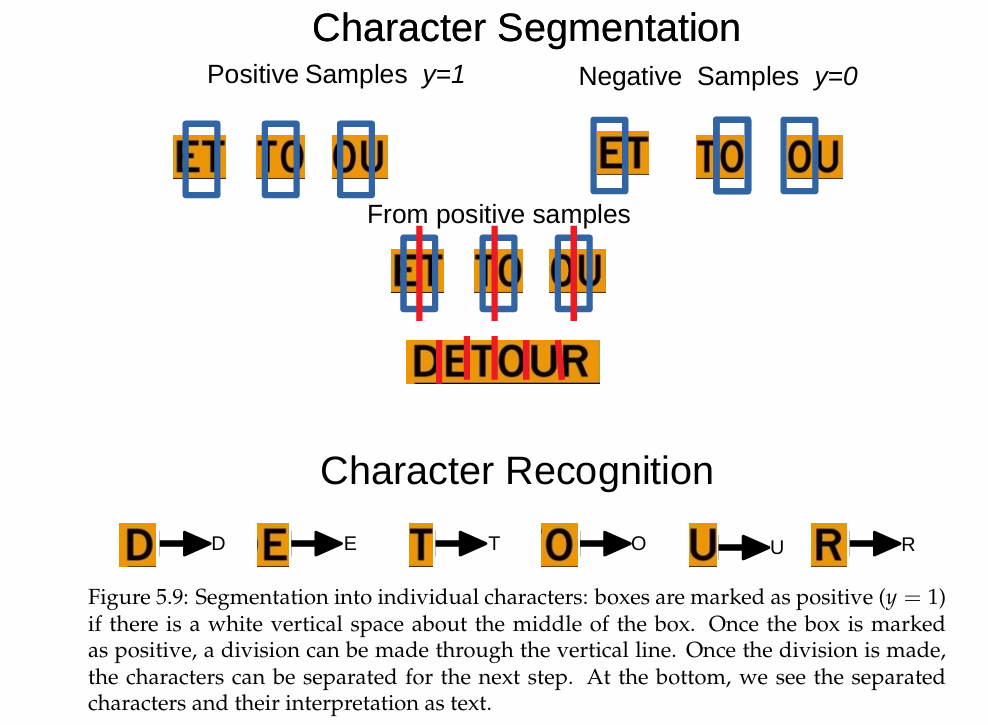